In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Let's inspect the data that we are working on:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Filling Blank's In TotalCharges Column And Changing Its dtype From object To float

In [4]:
df[df['TotalCharges'] == " "] 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


replacing blanks with 0 as tenure is also 0 so no total charges are recorded.

In [5]:
# Let's first fill all these blank values with 0 as their tenure is also 0
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype(float)

Now the values are not blank but 0

In [6]:
df[df["TotalCharges"] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


Now the datatype of TotalCharges is float instead of object(String).

In [7]:
df.info() # Now the total charges column is float instead of object(string)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Checking For Null-Values(Missing Values) In our dataset

In [8]:
df.isnull().sum() # Checking in each column.

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.isnull().sum().sum() # Checking overall for null values.

0

#There is no null values or missing values in entire dataset.

# Statistical Summery [Customer Churn]

In [10]:
# Let's check our statistical summary or descriptive summary:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# Checking For Duplicates

#Checking on the basis of entire row

In [11]:
df.duplicated().sum()

0

#Checking on the basis of something unique from the dataset which is the customerID column 

In [12]:
df['customerID'].duplicated().sum()

0

# Changing The Data In SeniorCitizen Column

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#Checking for the unique values in the column:

In [14]:
df["SeniorCitizen"].unique() # Instead of this 0 and 1 we will make this "Yes" and "No"

array([0, 1], dtype=int64)

#Applying a function to change the values in the column:

In [15]:
# This function will be applied to the entire SeniorCitizen column.
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

#Checking for all the unique values in df["SeniorCitizen"] column and there is no 0 and 1 now.

#We have changed the values from 0/1 to Yes/No to make it easier to understand.

In [16]:
df["SeniorCitizen"].unique()

array(['No', 'Yes'], dtype=object)

#dtype('O') which means it’s now strings instead of integers.

In [17]:
df["SeniorCitizen"].dtype 

dtype('O')

# Analysis Based On Churn

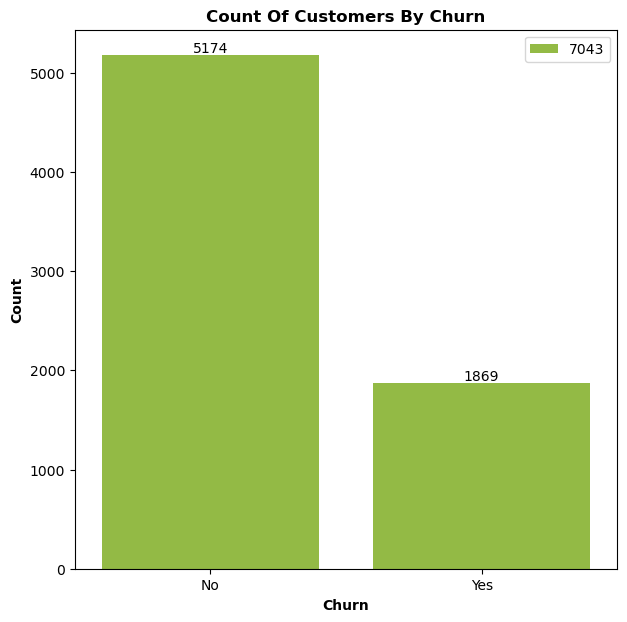

In [18]:
plt.figure(figsize=(7,7))
sns.reset_defaults()
ax = sns.countplot(x="Churn", data=df, color="yellowgreen")
ax.bar_label(ax.containers[0])
plt.title("Count Of Customers By Churn",fontweight="bold")
plt.xlabel("Churn",fontweight="bold")
plt.ylabel("Count",fontweight="bold")
plt.legend(df.count())
plt.show()

#From the above countplot i hava analysed that there are 1869 number of customers who have churned out.

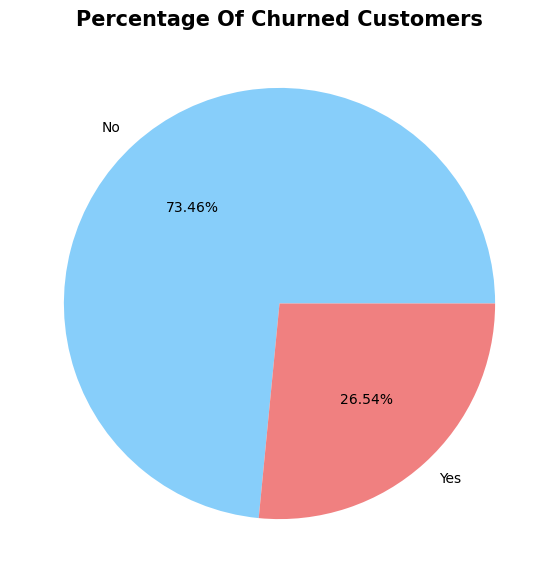

In [21]:
plt.figure(figsize=(7,7))
churned_data_gb = df.groupby('Churn').agg({'Churn':'count'})
plt.pie(churned_data_gb['Churn'],autopct="%1.2f%%",labels=churned_data_gb.index,colors=['lightskyblue','lightcoral'])
plt.title("Percentage Of Churned Customers",fontweight="bold",fontsize=15)
plt.show()

#From the given pie chart i have analysed that 26.54% of customers have churned out.

#Now let's explore the reason behind it.

# Analysis Based On gender and Churn

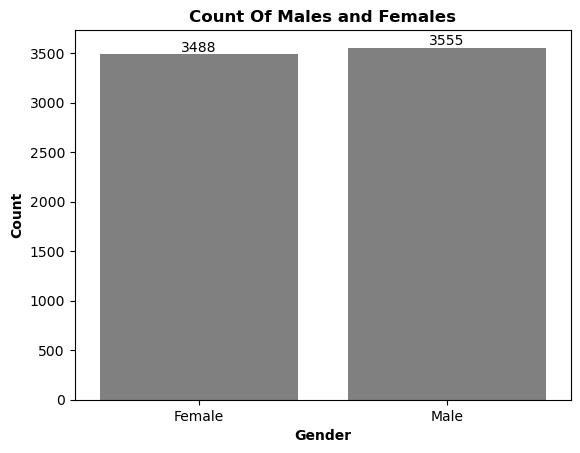

In [22]:
# Let's see the Number of Males and Females in the dataset:
ax = sns.countplot(x='gender',data=df,color='grey')
ax.bar_label(ax.containers[0])
plt.title("Count Of Males and Females",fontweight="bold")
plt.xlabel("Gender",fontweight="bold")
plt.ylabel("Count",fontweight="bold")
plt.show()

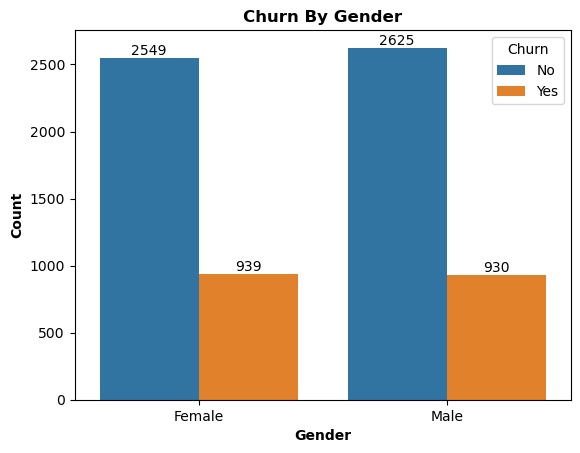

In [23]:
# Let's see the churn data based on gender:
ax = sns.countplot(x='gender',data=df,hue='Churn')
ax.bar_label(ax.containers[0]) # To show the bar count of Number of Males and Females.
ax.bar_label(ax.containers[1]) # To show the bar count of Number of Males and Females that have Churned Out.
plt.title("Churn By Gender",fontweight="bold")
plt.xlabel("Gender",fontweight="bold")
plt.ylabel("Count",fontweight="bold")
plt.show()

#From the above countplot i have analysed that both male and female churn data is almost same but we can see that female count for churned out is slightly more compared to males.

# Analysis Based On Senior Citizen's and Churn

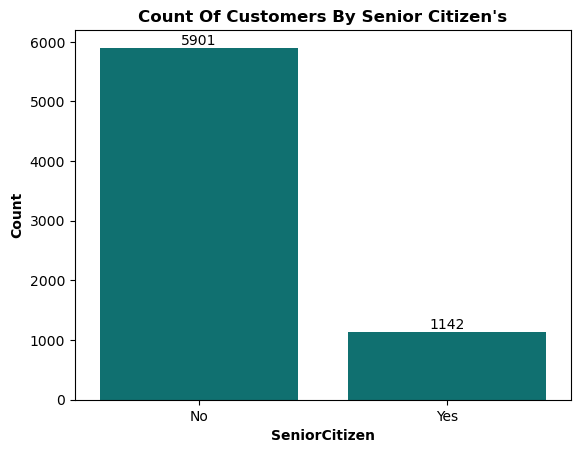

In [24]:
# Count of customers by senior citizen's: 
ax = sns.countplot(x="SeniorCitizen",data=df,color='teal')
ax.bar_label(ax.containers[0])
plt.title("Count Of Customers By Senior Citizen's",fontweight="bold")
plt.xlabel("SeniorCitizen",fontweight="bold")
plt.ylabel("Count",fontweight="bold")
plt.show()

#From the above plot i can say that there are less customers who are senior citizen's.

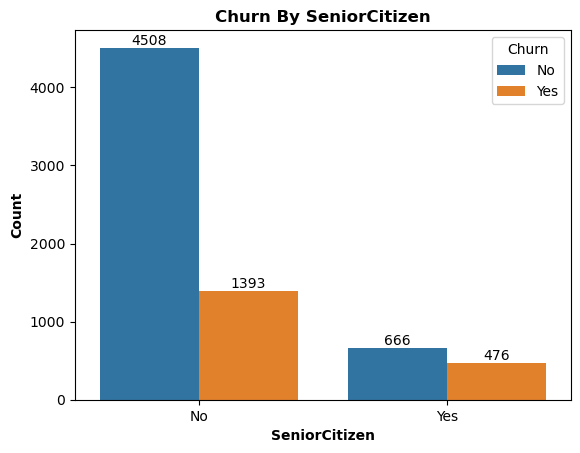

In [25]:
# Let's see the churn data based on SeniorCitizen:
ax = sns.countplot(x='SeniorCitizen',data=df,hue='Churn')
ax.bar_label(ax.containers[0]) # To show the bar count of Number of Males and Females.
ax.bar_label(ax.containers[1]) # To show the bar count of Number of Males and Females that have Churned Out.
plt.title("Churn By SeniorCitizen",fontweight="bold")
plt.xlabel("SeniorCitizen",fontweight="bold")
plt.ylabel("Count",fontweight="bold")
plt.show()

#From the above plot i have analysed that the customers who are senior citizens are the one who have churned out the most in comparison to the customers who are not senior citizens. 

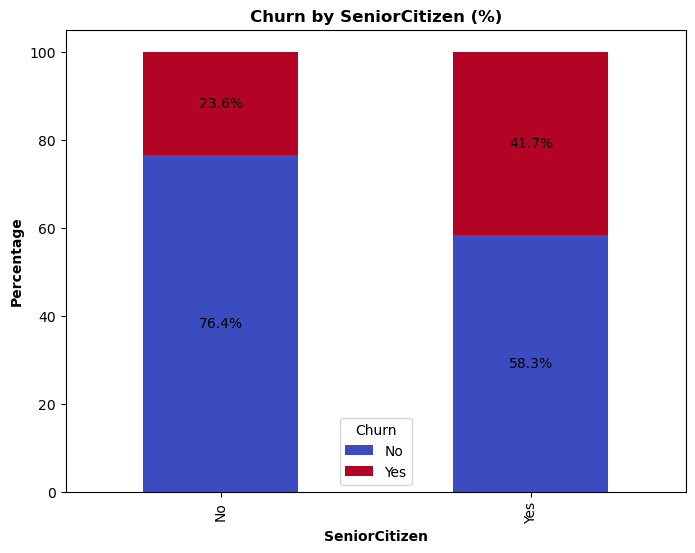

In [26]:
data = df.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='count')

# Calculate percentage within each SeniorCitizen group
data['percent'] = data.groupby('SeniorCitizen')['count'].transform(lambda x: 100 * x / x.sum())

# Create stacked bar chart
pivot_df = data.pivot(index='SeniorCitizen', columns='Churn', values='percent')

ax = pivot_df.plot(kind='bar', stacked=True, figsize=(8,6), colormap='coolwarm')

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

plt.title("Churn by SeniorCitizen (%)", fontweight="bold")
plt.xlabel("SeniorCitizen", fontweight="bold")
plt.ylabel("Percentage", fontweight="bold")
plt.legend(title="Churn")
plt.show()

#This shows the percentage of customers who are sentior citizen's and who are not and within those who churned out.

#Comparative a greater number of customers from the senior citizen's category have churned.

# Analysis Based On Tenure and Churn

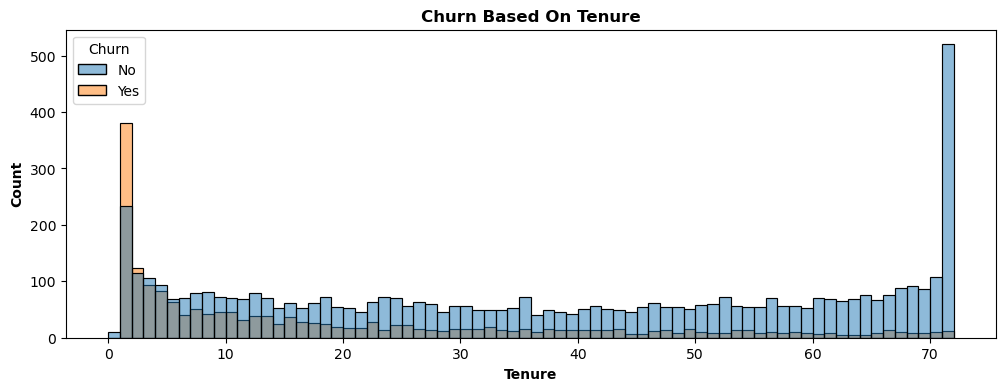

In [27]:
# Churned Out Customers Based On Tenure:
plt.figure(figsize=(12,4))
sns.histplot(x='tenure',data=df,bins=72,hue='Churn')
plt.title("Churn Based On Tenure",fontweight="bold")
plt.xlabel("Tenure",fontweight="bold")
plt.ylabel("Count",fontweight="bold")
plt.show()

#The customers who have used our services for a long time have stayed but customers who have used our services for 1 or 2 months have churned out.

# Analysis Based On Contracts That leads To Churned Out

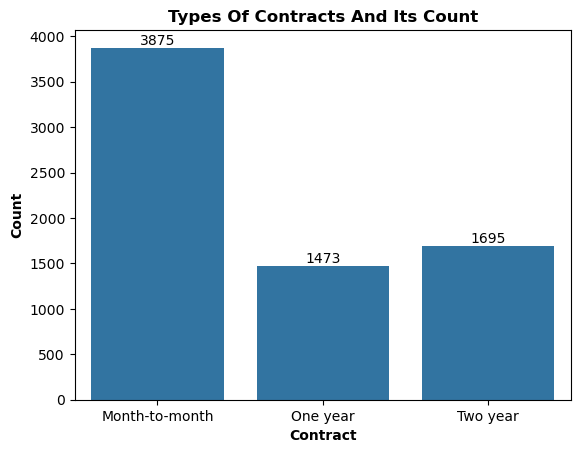

In [28]:
ax = sns.countplot(x='Contract',data=df)
ax.bar_label(ax.containers[0])
plt.title("Types Of Contracts And Its Count",fontweight="bold")
plt.xlabel("Contract",fontweight="bold")
plt.ylabel("Count",fontweight="bold")
plt.show()

#Here we can see that a lot of customers who are using the services have the Month-to-Month contract compared to One year and Two year contracts.

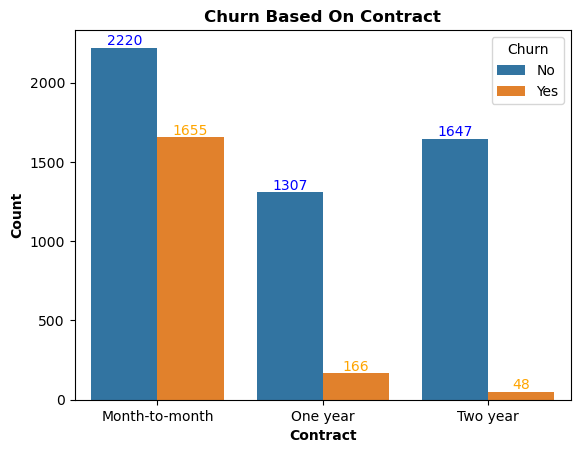

In [29]:
ax = sns.countplot(x='Contract',data=df,hue='Churn')
ax.bar_label(ax.containers[0],color='blue')
ax.bar_label(ax.containers[1],color='orange')
plt.title("Churn Based On Contract",fontweight="bold")
plt.xlabel("Contract",fontweight="bold")
plt.ylabel("Count",fontweight="bold")
plt.show()

#Here i have analysed that the customers who have the Month-to-Month contract are the ones who have churned out the most compared to the customes whit other contracts.

#We can persuade people by showing that if they take one year or two year contracts they will get more benefit compared to month to month contract and this can make them stay for a long time.

# Services That Comes With Tenure

In [30]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

#### Services Taken Based On Customers

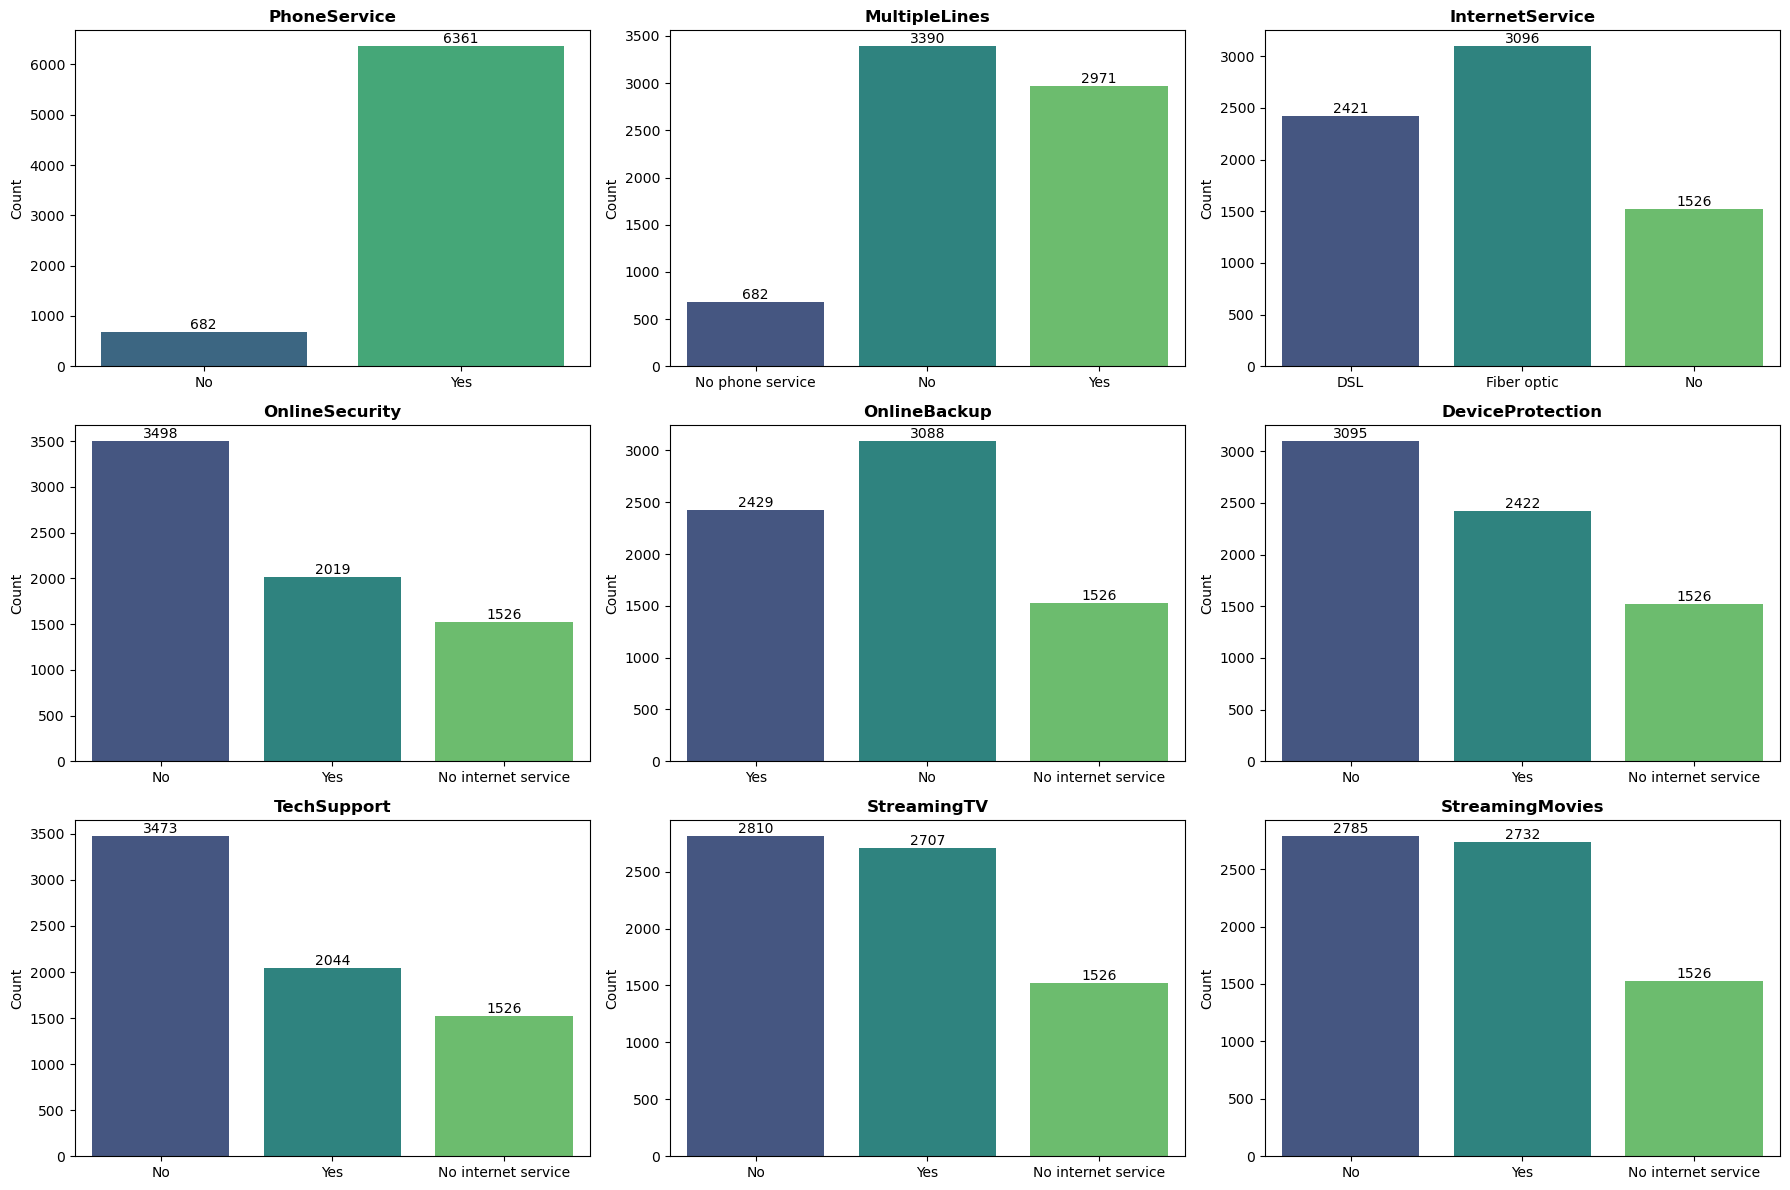

In [31]:
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]# These are the services that comes with tenure and contracts.

# Create subplots: 3 rows × 3 columns (because 9 plots)
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()  # make it 1D array for easy looping

for i, col in enumerate(cols):
    ax = sns.countplot(x=col,hue=col, data=df, ax=axes[i], palette='viridis',legend=False)
    ax.set_title(col, fontweight="bold", fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    for container in ax.containers:  # add count labels
        ax.bar_label(container)

plt.tight_layout()
plt.show()

#### Services With Churn

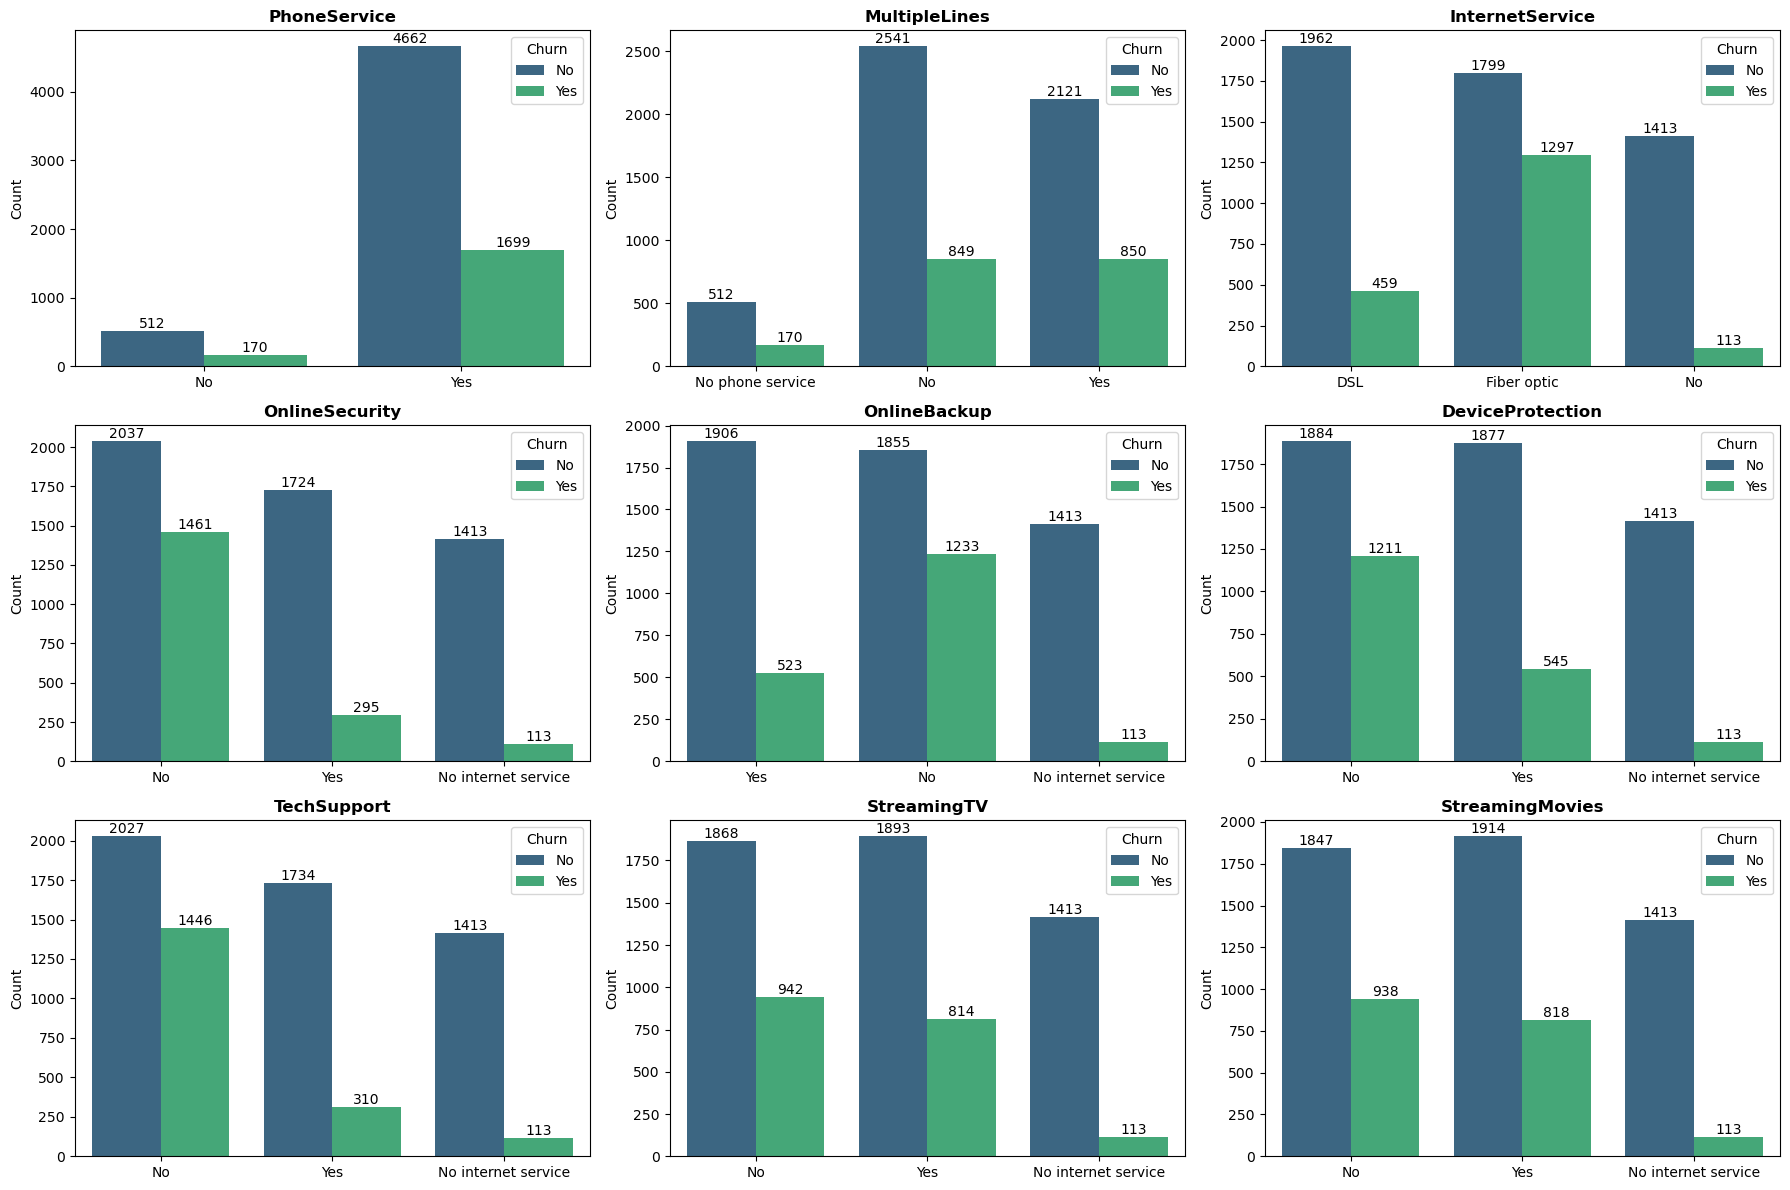

In [32]:
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Create subplots: 3 rows × 3 columns (because 9 plots)
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()  # make it 1D array for easy looping

for i, col in enumerate(cols):
    ax = sns.countplot(x=col,hue=df['Churn'], data=df, ax=axes[i], palette='viridis')
    ax.set_title(col, fontweight="bold", fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    for container in ax.containers:  # add count labels
        ax.bar_label(container)

plt.tight_layout()
plt.show()

#From the plots, it’s clear that customers without additional services like OnlineSecurity, TechSupport, and OnlineBackup show higher churn rates compared to those who have them.
Fiber optic internet users have significantly higher churn than DSL users.
Services like PhoneService show lower churn proportionally, while value-added services (e.g., streaming or device protection) alone do not appear to strongly prevent churn unless bundled with security or support services.

# Churn Analysis Based On Payment Methods

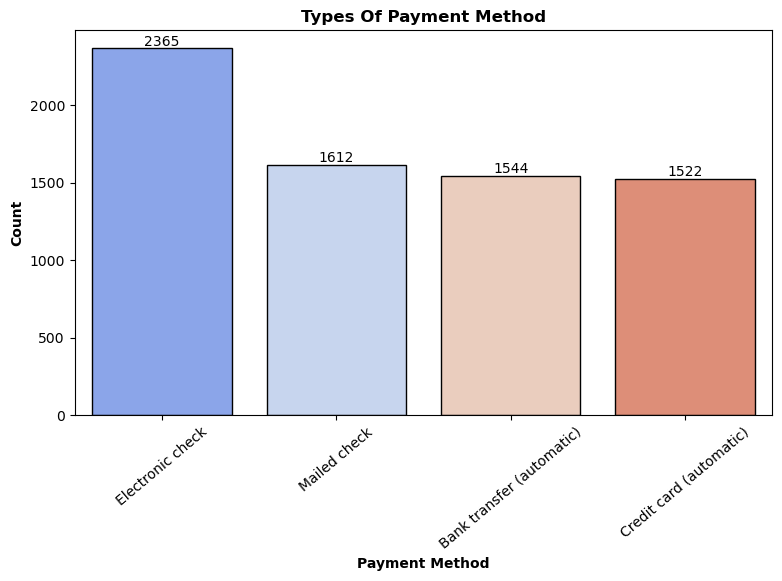

In [33]:
# Count of payment methods:
plt.figure(figsize=(9,5))
ax = sns.countplot(x='PaymentMethod',data=df,palette='coolwarm',legend=False,hue='PaymentMethod',edgecolor='black')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
plt.title("Types Of Payment Method",fontweight="bold")
plt.xlabel("Payment Method",fontweight="bold")
plt.ylabel("Count",fontweight="bold")
plt.xticks(rotation=40)
plt.show()

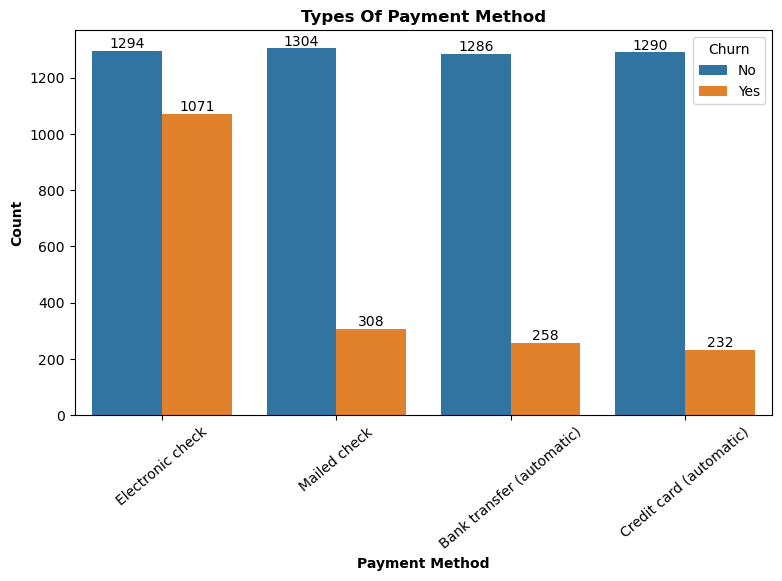

In [ ]:
# Churn based on payment methods:
plt.figure(figsize=(9,5))
ax = sns.countplot(x='PaymentMethod',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Types Of Payment Method",fontweight="bold")
plt.xlabel("Payment Method",fontweight="bold")
plt.ylabel("Count",fontweight="bold")
plt.xticks(rotation=40)
plt.show()

#The plot shows that customers paying via Electronic Check have the highest churn rate, with churn counts almost equal to non-churn counts.
In contrast, automatic payment methods (bank transfer and credit card) have significantly lower churn rates, suggesting they may improve retention.
Mailed checks also show lower churn compared to electronic checks but higher than automatic methods.